# AMAT503:  Lecture 19

March 22, 2018 and March 26.

Michael Lamoureux

We are doing multiresolution analysis, applied to real functions on the line.


In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from pywt import *

## 1. Multiresolution Analysis - applied

We want to do a multiresolution analysis on some real functions. You might need to look at the last class's lecture notes to see the details.

We start with a function $f(t)$ and a scaling function $\phi(t)$ in the space $V_0$ and write down some coefficients

 $$y_k = \int f(t) \overline{\phi(t-k)} \, dt. $$
 
 We then apply the corresponding discrete wavelet transform to get coefficients for the multiresolution analysis. This way, function $f$ is expressed as a linear combination of scaled versions of the wavelet functions (and a scaled version of the scaling function.)


We start by defining a function:

In [2]:
def f(t):
    return (t>0)+ .5*(t>1) + .3*(t>2) + .2*(t>3)


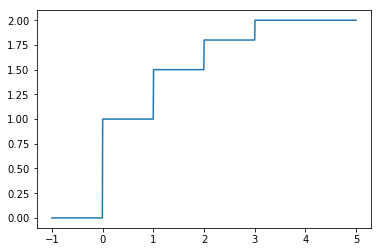

In [3]:
t = linspace(-1,5,1000)
plot(t,f(t));

Let's get our scaling function, and wavelet function.

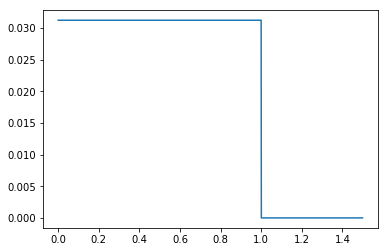

In [8]:
w = Wavelet('db1')
h = w.dec_lo
z = [1]
for k in range(10):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x
    
phi = x
plot(linspace(0,size(phi)/1024,size(phi)),phi);

In [5]:
size(phi)

1535

In [6]:
h

[0.7071067811865476, 0.7071067811865476]

In [9]:
# Check normalization, sum of squares should be one.
sum(phi**2)

1.0000000000000002

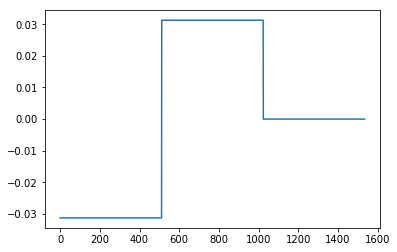

In [10]:
w = Wavelet('db1')
h = w.dec_lo
g = w.dec_hi
z = [1]
x = convolve(z,g)
z = zeros(2*size(x))
z[0:size(z):2] = x

for k in range(9):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x

psi = x
plot(psi);

In [13]:
# Compute the initial scaling coefficient. 

N = 10
y = zeros(N,float_)
t = linspace(0,1,size(phi))
dt = 1/size(phi)
for k in range(N):
    y[k] = sum(f(t+k)*phi)
    
y

array([ 31.96875 ,  47.984375,  57.590625,  63.99375 ,  64.      ,
        64.      ,  64.      ,  64.      ,  64.      ,  64.      ])

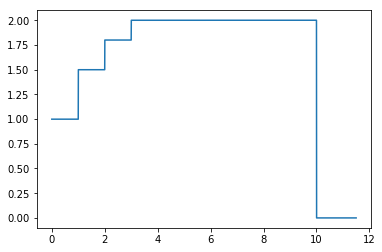

In [14]:
# Let's build a reconstruction of f from these coefficients

f_len = 1024*size(y) + size(phi)
f_recon = zeros(f_len, float_)

for k in range(size(y)):
    f_recon[(1024*k):(1024*k+size(phi))] = f_recon[(1024*k):(1024*k+size(phi))] + y[k]*phi
    
plot(linspace(0,size(f_recon)/1024,size(f_recon)),f_recon);

In [15]:
## Let's compute some wavelet coefficients

(cA, cD) = dwt(y, 'db1')
cA, cD

(array([ 56.53539686,  85.97313605,  90.50966799,  90.50966799,  90.50966799]),
 array([-11.32475704,  -4.52769311,   0.        ,   0.        ,   0.        ]))

We should be able to reconstruct f using these coefficients. 


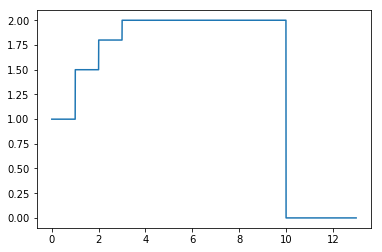

In [18]:
fw_len = 1024*size(cA) + size(phi)
fw_recon = zeros(fw_len, float_)

for k in range(size(cA)):
    fw_recon[(1024*k):(1024*k+size(phi))] = fw_recon[(1024*k):(1024*k+size(phi))] + \
        cA[k]*phi - cD[k]*psi
    
plot(linspace(0,size(fw_recon)/512,size(fw_recon)),fw_recon/sqrt(2));

Notice I had to put a sqrt(2) in the plot command to get this to work out correctly. You might want to think about that. (So do I.)

Now, of course we could repeat this discrete wavelet transform several times. The point is, we never have to computer inner products anymore to get the wavelet coefficients for the function. They just come out of the discrete wavelet algorithm. This is a very powerful idea. 

### More complicated functions, wavelets

Let's see what happens if we use a more complicated function. Something with lots of wiggles and changes. I suggest we use a sinusoid that decays quickly. Maybe we can let the frequency change a lot.

We should then try to approximate using a wiggly Daubechies wavelets.

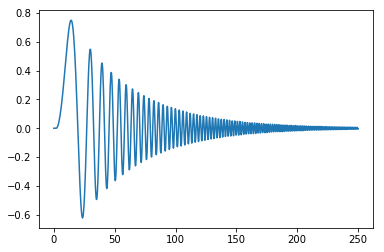

In [125]:
def f(t):
    return (t>2)*exp(-t/50)*sin(.01*(t-2)**2)

t=linspace(0,250,1000)
plot(t,f(t));

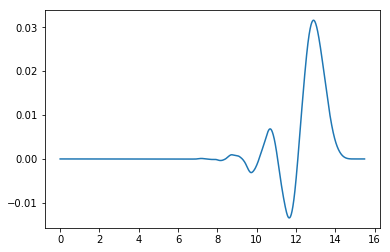

In [126]:
w = Wavelet('db8')
h = w.dec_lo
z = [1]
for k in range(10):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x
    
phi = x
plot(linspace(0,size(phi)/1024,size(phi)),phi);

Notice this scaling function looks backwards (it is backwards!)

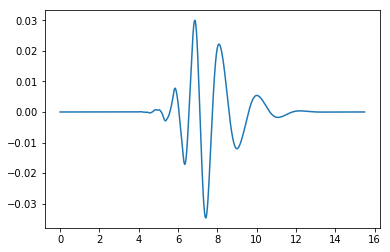

In [127]:
w = Wavelet('db8')
h = w.dec_lo
g = w.dec_hi
z = [1]
x = convolve(z,g)
z = zeros(2*size(x))
z[0:size(z):2] = x

for k in range(9):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x

psi = x
plot(linspace(0,size(psi)/1024,size(psi)),psi);

This wavelet function is also backwards, at least according to Daubechies' book, and Wikipedia.

In [128]:
# Compute the initial scaling coefficient. 

N = 250
y = zeros(N,float_)
t = linspace(0,1,size(phi))
dt = 1/size(phi)
for k in range(N):
    y[k] = sum(f(t+k)*phi)
    

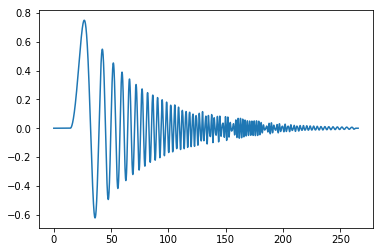

In [129]:
# Let's build a reconstruction of f from these coefficients

f_len = 1024*size(y) + size(phi)
f_recon = zeros(f_len, float_)

for k in range(size(y)):
    f_recon[(1024*k):(1024*k+size(phi))] = f_recon[(1024*k):(1024*k+size(phi))] + y[k]*phi
    
plot(linspace(0,size(f_recon)/1024,size(f_recon)),f_recon);

In [130]:
## Let's compute some wavelet coefficients

(cA, cD) = dwt(y, 'db8')
cA, cD

(array([  3.01750674e+01,   2.24816532e+01,   1.39375190e+01,
          6.69155231e+00,   1.77825217e+00,   1.45125108e-01,
         -4.90575612e-02,   1.45893530e-01,   2.82412388e+00,
          8.39090792e+00,   1.61713237e+01,   2.47966212e+01,
          3.18398238e+01,   3.38556104e+01,   2.74127217e+01,
          1.14476991e+01,  -9.81804628e+00,  -2.60118140e+01,
         -2.53542535e+01,  -5.33859009e+00,   1.89105167e+01,
          2.29576801e+01,   1.39871525e-01,  -2.17278328e+01,
         -1.07771646e+01,   1.67690478e+01,   1.29663404e+01,
         -1.52909071e+01,  -9.72579016e+00,   1.68379894e+01,
          1.15503654e+00,  -1.57698427e+01,   1.07682687e+01,
          4.27332003e+00,  -1.36330230e+01,   1.18190202e+01,
         -3.29345716e+00,  -5.24806152e+00,   1.00489185e+01,
         -1.08252647e+01,   9.06780832e+00,  -6.43415840e+00,
          4.01888852e+00,  -2.30076076e+00,   1.35643308e+00,
         -1.07633333e+00,   1.29202049e+00,  -1.81985724e+00,
        

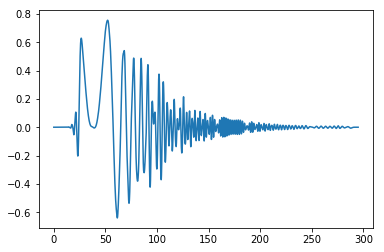

In [131]:
fw_len = 1024*size(cA) + size(phi)
fw_recon = zeros(fw_len, float_)

for k in range(size(cA)):
    fw_recon[(1024*k):(1024*k+size(phi))] = fw_recon[(1024*k):(1024*k+size(phi))] + \
        cA[k]*phi - cD[k]*psi
    
plot(linspace(0,size(fw_recon)/512,size(fw_recon)),fw_recon/sqrt(2));

In [132]:
## Let's explore orthogonality

phiOne = zeros(size(phi)+1024);
phiTwo = zeros(size(phi)+1024);

phiOne[0:size(phi)] = phi
phiTwo[1024:(1024+size(phi))] = phi

In [133]:
sum(phiOne*phiTwo)

1.6050109680166517e-17

In [134]:
psiOne = zeros(size(psi)+1024);
psiTwo = zeros(size(psi)+1024);
psiOne[0:size(psi)] = psi
psiTwo[1024:(1024+size(psi))] = psi


In [135]:
sum(psiOne*psiTwo)

0.0

In [136]:
sum(psiOne*phiOne)

-2.1684043449710089e-18

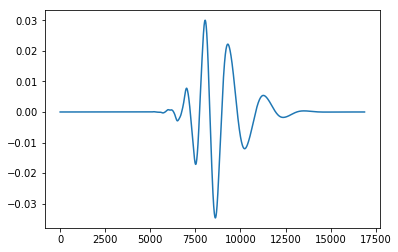

In [137]:
plot(psiTwo)

### Comments.

Well, some of those reconstructions are terrible!

Let's explore in class, might be interesting.


## Second attempt.

Here is what we did in class, to fix things.

First, we shift the function away from the boundary. Wavelets mess up at boundaries, unless you are very careful. We don't want to be that careful, so we just avoid the boundary


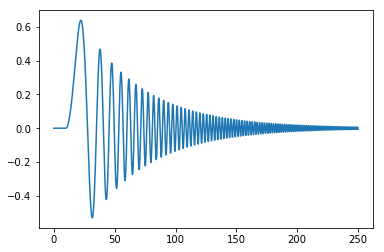

In [150]:
def f(t):
    return (t>10)*exp(-t/50)*sin(.01*(t-10)**2)  # start at t=10

t=linspace(0,250,10000)
plot(t,f(t));

### Flip wilson

The wavelets we got looked backwards, compared to what Wikipedia says our wavelets should look like. So let's flip the coefficients around. These will give scaling functions and wavelets that are minimum phase. I.e. most of the energy is concentrated at the front of the signal.

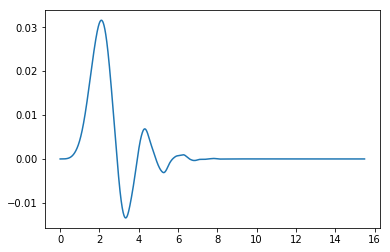

In [138]:
w = Wavelet('db8')
h = w.dec_lo
h = h[::-1]
z = [1]
for k in range(10):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x
    
phi = x
plot(linspace(0,size(phi)/1024,size(phi)),phi);

For the wavelet, we reverse order and also make it negative. (z=[-1] initially). 

This way it looks like the Daubechies wavelet.

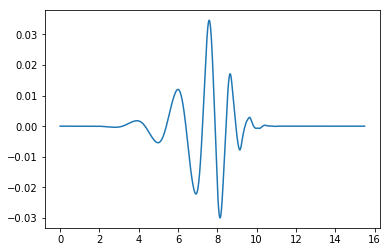

In [140]:
w = Wavelet('db8')
h = w.dec_lo
h = h[::-1]
g = w.dec_hi
g = g[::-1]
z = [-1]
x = convolve(z,g)
z = zeros(2*size(x))
z[0:size(z):2] = x

for k in range(9):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x

psi = x
plot(linspace(0,size(psi)/1024,size(psi)),psi);

## Another error.

We want to compute the integrals $y_k = \int f(t) \phi(t-k) dt.$ We need to be careful about the range of $t$ values that we use. The function $\phi(t)$ has support bigger than just the interval $[0,1]$. In the figure above, we see the support is really about $[0,12]$. The range of samples goes from 0 to size(phi)/1024. 


We have to use that in the $t$ variable in the following code:


In [210]:
# Compute the initial scaling coefficient. 

N = 250
y = zeros(N,float_)
t = linspace(0,size(phi)/1024,size(phi))
dt = 1/size(phi)
for k in range(N):
    y[k] = sum(f(t+k)*phi)

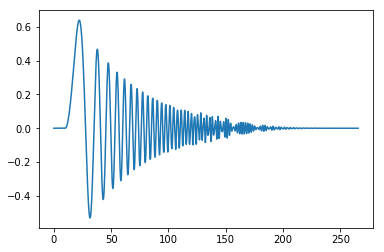

In [213]:
# Let's build a reconstruction of f from these coefficients

f_len = 1024*size(y) + size(phi)
f_recon = zeros(f_len, float_)

for k in range(size(y)):
    f_recon[(1024*k):(1024*k+size(phi))] = f_recon[(1024*k):(1024*k+size(phi))] + y[k]*phi

## We plot just the reconstruction
tt = linspace(0,size(f_recon)/1024,size(f_recon))
plot(tt,f_recon);


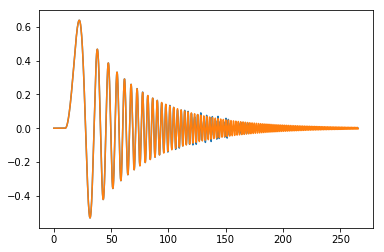

In [214]:
## We plot the original function f and its reconstruction, one on top of the other, to see they are close
tt = linspace(0,size(f_recon)/1024,size(f_recon))
plot(tt,f_recon,tt,f(tt));

###  Another error

PyWavelets tries to do something sensible when dealing with finite lenght signals. 

The issue is whether to wrap around, make the function periodic, make a reflection at the boundary, etc.

Choose poorly, and you get errors.

For us, we want to use zero padding, to treat the signal as if it is zero outside the samples that have been recorded and stored in our finite vector. When we call "dwt", we have to include the parameter 'zero' as follows. 

In [215]:
## Let's compute some wavelet coefficients

(cA, cD) = dwt(y, 'db8', 'zero')  # notice the keywork 'zero' to select zero padding boundary
cA, cD

(array([ -1.87861998e-11,  -8.72081725e-09,  -4.11790461e-07,
         -1.45919911e-06,  -1.65158340e-05,   3.44339669e-04,
         -2.04590689e-03,   7.18892957e-03,  -1.88829389e-02,
          4.51757875e-02,  -1.31922854e-01,   8.30103781e-01,
          4.26611395e+00,   9.96065464e+00,   1.71110742e+01,
          2.41728359e+01,   2.86404694e+01,   2.74031252e+01,
          1.81352250e+01,   1.69158667e+00,  -1.58196170e+01,
         -2.41348079e+01,  -1.55081523e+01,   5.67713623e+00,
          2.08245441e+01,   1.27426520e+01,  -1.06308519e+01,
         -1.81539626e+01,   2.43681217e+00,   1.75875658e+01,
         -5.10133285e-01,  -1.61717304e+01,   3.99281150e+00,
          1.31776724e+01,  -1.05363687e+01,  -4.62305953e+00,
          1.30550940e+01,  -8.39361081e+00,  -2.15413404e+00,
          9.62681353e+00,  -1.06504034e+01,   6.93202374e+00,
         -1.72741645e+00,  -2.63062114e+00,   5.29795272e+00,
         -6.43522617e+00,   6.57085616e+00,  -6.20013894e+00,
        

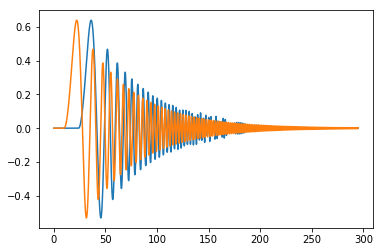

In [208]:
fw_len = 1024*size(cA) + size(phi)
fw_recon = zeros(fw_len, float_)

for k in range(size(cA)):
    fw_recon[(1024*k):(1024*k+size(phi))] = fw_recon[(1024*k):(1024*k+size(phi))] + \
        cA[k]*phi - cD[k]*psi
    
#We plot the two functions, one on top of the other, to see if they are close. They aren't!
tt = linspace(0,size(fw_recon)/512,size(fw_recon))
plot(tt,fw_recon/sqrt(2),tt,f(tt));

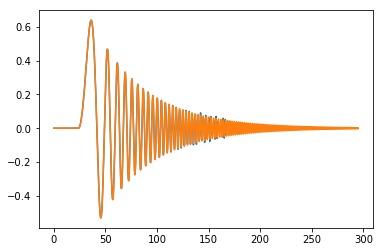

In [209]:
#We plot the two functions, one on top of the other, with one of them shifted by 14. Looks better.
tt = linspace(0,size(fw_recon)/512,size(fw_recon))
plot(tt,fw_recon/sqrt(2),tt,f(tt-14));

So, why 14? Maybe this has something to do with the wrap around and zero padding. The 14 might have to do with the fact that db8 has 16 coefficients. 14 = 16-2.

Let's try this with db10 to confirm. 

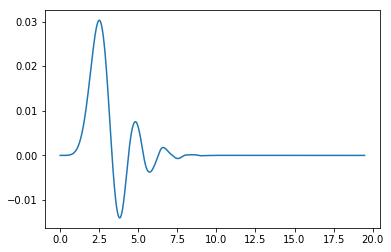

In [217]:
w = Wavelet('db10')
h = w.dec_lo
h = h[::-1]
z = [1]
for k in range(10):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x
    
phi = x
plot(linspace(0,size(phi)/1024,size(phi)),phi);

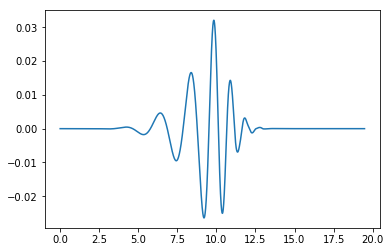

In [219]:
w = Wavelet('db10')
h = w.dec_lo
h = h[::-1]
g = w.dec_hi
g = g[::-1]
z = [-1]
x = convolve(z,g)
z = zeros(2*size(x))
z[0:size(z):2] = x

for k in range(9):
    x = convolve(z,h)
    z = zeros(2*size(x))
    z[0:size(z):2] = x

psi = x
plot(linspace(0,size(psi)/1024,size(psi)),psi);

In [220]:
# Compute the initial scaling coefficient. 

N = 250
y = zeros(N,float_)
t = linspace(0,size(phi)/1024,size(phi))
dt = 1/size(phi)
for k in range(N):
    y[k] = sum(f(t+k)*phi)

In [222]:
## Let's compute some wavelet coefficients

(cA, cD) = dwt(y, 'db10', 'zero')  # notice the keywork 'zero' to select zero padding boundary
cA, cD;

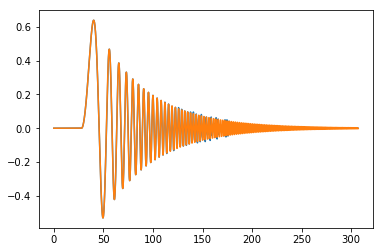

In [225]:
## Plot the wavelet reconstrunction, and shift by 18 the original function

fw_len = 1024*size(cA) + size(phi)
fw_recon = zeros(fw_len, float_)

for k in range(size(cA)):
    fw_recon[(1024*k):(1024*k+size(phi))] = fw_recon[(1024*k):(1024*k+size(phi))] + \
        cA[k]*phi - cD[k]*psi
    
#We plot the two functions, one on top of the other, to see if they are close. They aren't!
tt = linspace(0,size(fw_recon)/512,size(fw_recon))
plot(tt,fw_recon/sqrt(2),tt,f(tt-18));

### Verified! We had to shift by 18 =  20-2. 

I don't know why. But it sure is interesting.

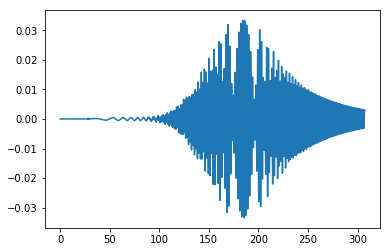

In [236]:
#We plot the difference of the two functions. We see the error gets pretty big at higher frequencies. 
tt = linspace(0,size(fw_recon)/512,size(fw_recon))
plot(tt,fw_recon/sqrt(2)-f(tt-18));

In [226]:
## Let's explore orthogonality

phiOne = zeros(size(phi)+1024);
phiTwo = zeros(size(phi)+1024);

phiOne[0:size(phi)] = phi
phiTwo[1024:(1024+size(phi))] = phi

In [227]:
sum(phiOne*phiTwo)

3.5182711567141243e-17

In [228]:
f(9)


0.0

In [152]:
f(10)

0.0

In [153]:
f(11)

0.0080250542271605545

In [154]:
f(12)

0.031456724416707632

In [195]:
y[1]

-2.6134435921700234e-07

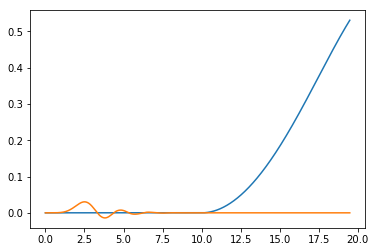

In [229]:
t = linspace(0,size(phi)/1024,size(phi))
plot(t,f(t),t,phi)

In [230]:
sum(f(t)*phi)

-1.2604318363800155e-06

In [231]:
y[0]

-1.2604318363800155e-06

In [232]:
y[0]

-1.2604318363800155e-06

In [233]:
cA[0]

-2.3460683354070367e-10

In [234]:
y[0:16]

array([ -1.26043184e-06,   8.79394675e-06,  -2.24220372e-05,
        -8.84242168e-06,   2.39320476e-04,  -8.71779364e-04,
         1.94036289e-03,  -2.66437928e-03,  -7.00305779e-03,
         3.27418006e-01,   1.13871118e+00,   2.40698919e+00,
         4.09458596e+00,   6.15142734e+00,   8.50680512e+00,
         1.10603837e+01])